# Flights Data Exploration
## by Thays Martinez

## Preliminary Wrangling

This document explores approximately 5.3 million cancelled and delayed flights within United States and Canada which were registered between 1st of January 2018 and 31st of December 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [81]:
# Load dataset into a pandas DataFrame
df_flights = pd.read_csv('flights.csv', low_memory=False)

In [82]:
# Convert to category
df_flights['cancellation_desc'] = df_flights['cancellation_desc'].astype('category')

In [83]:
df_flights['cancelled'] = df_flights.cancelled.astype('str')
df_flights['crs_dep_hour'] = df_flights.crs_dep_hour.astype('str').str.zfill(2)

In [84]:
df_flights.head()

,fl_date,year,month,weekday,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state,crs_dep_time,crs_dep_hour,actual_dep_time,dep_delay,taxi_out,...,crs_arr_time,actual_arr_time,arr_delay,cancelled,cancellation_desc,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-03-01,2019,Mar,Friday,CVG,Cincinnati,OH,MSP,Minneapolis,OH,15:34:00,15,16:17:00,43.0,28.0,...,16:48:00,17:47:00,59.0,False,NaN,False,134,90.0,74.0,596,0.0,0.0,59.0,0.0,0.0
1,2019-03-01,2019,Mar,Friday,JFK,New York,NY,BUF,Buffalo,NY,09:40:00,09,10:35:00,55.0,56.0,...,11:14:00,12:36:00,82.0,False,NaN,False,94,121.0,94.0,301,0.0,55.0,27.0,0.0,0.0
2,2019-03-01,2019,Mar,Friday,MSN,Madison,WI,LGA,New York,WI,18:45:00,18,19:54:00,69.0,14.0,...,21:58:00,23:12:00,74.0,False,NaN,False,133,198.0,193.0,812,0.0,0.0,6.0,0.0,68.0
3,2019-03-01,2019,Mar,Friday,JFK,New York,NY,BUF,Buffalo,NY,13:36:00,13,15:30:00,114.0,30.0,...,15:13:00,16:58:00,105.0,False,NaN,False,97,88.0,97.0,301,35.0,0.0,0.0,0.0,70.0
4,2019-03-01,2019,Mar,Friday,ATL,Atlanta,GA,TYS,Knoxville,GA,13:40:00,13,14:25:00,45.0,18.0,...,14:38:00,15:20:00,42.0,False,NaN,False,58,55.0,58.0,152,42.0,0.0,0.0,0.0,0.0


In [85]:
# High-level overview of data shape and composition
pd.set_option('display.max_columns', 30)
print(df_flights.shape)
print(df_flights.info(null_counts=True))

(5268948, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268948 entries, 0 to 5268947
Data columns (total 33 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   fl_date              5268948 non-null  object  
 1   year                 5268948 non-null  int64   
 2   month                5268948 non-null  object  
 3   weekday              5268948 non-null  object  
 4   origin_airport       5268948 non-null  object  
 5   origin_city          5268948 non-null  object  
 6   origin_state         5268948 non-null  object  
 7   dest_airport         5268948 non-null  object  
 8   dest_city            5268948 non-null  object  
 9   dest_state           5268948 non-null  object  
 10  crs_dep_time         5268948 non-null  object  
 11  crs_dep_hour         5268948 non-null  object  
 12  actual_dep_time      5017439 non-null  object  
 13  dep_delay            5017439 non-null  float64 
 14  taxi_out            

### What is the structure of your dataset?

This dataset contains 5,268,948 flights which were cancelled or delayed. It is comprised of 28 features:

- fl_date: flight date (YYYY-MM-DD)
- origin_airport: departure airport
- origin_city: departure city
- origin_state: departure state
- dest_airport: airport of arrival
- dest_city: arrival city
- dest_state: arrival state
- crs_dep_time: scheduled departure time registered in CRS (Computer/Central Reservation System) (HH:MM:SS)
- actual_dep_time: actual departure time (HH:MM:SS)
- dep_delay: difference in minutes between scheduled and actual departure time. 
- taxi_out: time taken to taki aircraft before departure, in minutes
- wheels_off: time wheels leave the ground (HH:MM:SS)
- wheels_on: time wheels touch the ground (HH:MM:SS)
- taxi_in: time taken to taki aircraft upon arrival, in minutes
- crs_arr_time: scheduled arrival time registered in CRS (HH:MM:SS)
- actual_arr_time: actual arrival time (HH:MM:SS)
- arr_delay: difference in minutes between scheduled and actual arrival time. 
- cancelled: flag if flight was cancelled (1) or finalized (0)
- cancellation_desc: reason for cancellation (Weather, Carrier, NAS or Security).
- diverted: if flight was rerouted (1) or not (0)
- crs_elapsed_time: CRS elapsed time of flight, in minutes
- actual_elapsed_time: elapsed time of flight, in minutes
- air_time: flight time, in minutes
- distance: distance between airports, in miles
- carrier_delay: delay cause, in minutes
- weather_delay: delay cause, in minutes
- nas_delay: delay cause, in minutes
- security_delay: delay cause, in minutes
- late_aircraft_delay: delay cause, in minutes

Most variables are either numeric or object types. The variable **cancellation_desc** is categorical and has the following classification:

- **Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **Late Aircraft:** A previous flight with same aircraft arrived late, causing the present flight to depart late.
- **NAS:** Stands for National Aviation System. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- **Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what factors have the most influence in flight cancellation and severe delays.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Although delay cause will give us a good indication of the reason a flight is delayed, I am also expecting that features such as flight date, origin state, CRS departure time and arrival delay will have effects on flight's cancellation and delay duration. I also think that other features will have effects on the cancellation and delay's duration, though to a much smaller degree.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [86]:
def chart_props(df, col_name):
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[col_name].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        
        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)
        
        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', verticalalignment='bottom', color = 'black')
        
# create the plot
sb.set_style('darkgrid')
base_color = sb.color_palette()[0]

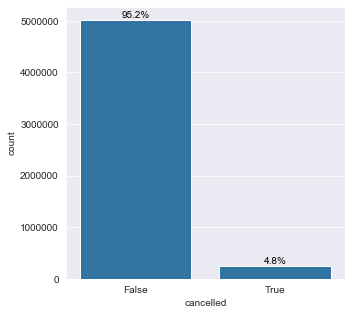

In [87]:
plt.figure(figsize=[5, 5])
col_order = df_flights.cancelled.value_counts().index

sb.countplot(data=df_flights, x='cancelled', color=base_color, order=col_order)
chart_props(df_flights, 'cancelled')

Flights with cancelled status accounts for approximately 5% of the dataset. Note that we have only flights that are either cancelled or delayed.

I'll start by looking into the cancelled flights first.

In [88]:
df_cancelled = df_flights.query('cancelled == "True"').reset_index(drop=True)

df_cancelled.head()

,fl_date,year,month,weekday,origin_airport,origin_city,origin_state,dest_airport,dest_city,dest_state,crs_dep_time,crs_dep_hour,actual_dep_time,dep_delay,taxi_out,...,crs_arr_time,actual_arr_time,arr_delay,cancelled,cancellation_desc,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-03-01,2019,Mar,Friday,ORF,Norfolk,VA,LGA,New York,VA,18:55:00,18,NaN,NaN,NaN,...,20:42:00,NaN,NaN,True,Weather,False,107,NaN,NaN,296,NaN,NaN,NaN,NaN,NaN
1,2019-03-01,2019,Mar,Friday,CHO,Charlottesville,VA,CLT,Charlotte,VA,19:40:00,19,NaN,NaN,NaN,...,21:05:00,NaN,NaN,True,Weather,False,85,NaN,NaN,245,NaN,NaN,NaN,NaN,NaN
2,2019-03-01,2019,Mar,Friday,CLT,Charlotte,NC,CHO,Charlottesville,NC,17:55:00,17,NaN,NaN,NaN,...,19:10:00,NaN,NaN,True,Weather,False,75,NaN,NaN,245,NaN,NaN,NaN,NaN,NaN
3,2019-03-01,2019,Mar,Friday,GSP,Greer,SC,ORD,Chicago,SC,10:11:00,10,NaN,NaN,NaN,...,11:15:00,NaN,NaN,True,Weather,False,64,NaN,NaN,577,NaN,NaN,NaN,NaN,NaN
4,2019-03-01,2019,Mar,Friday,DFW,Dallas/Fort Worth,TX,CRP,Corpus Christi,TX,20:43:00,20,NaN,NaN,NaN,...,22:07:00,NaN,NaN,True,Weather,False,84,NaN,NaN,354,NaN,NaN,NaN,NaN,NaN


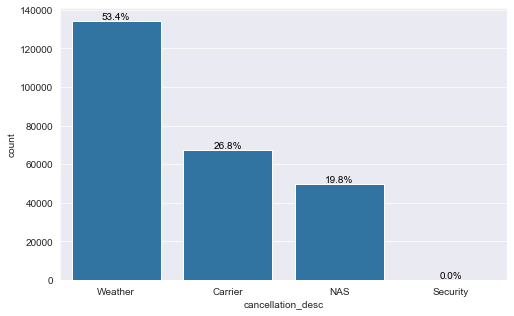

In [89]:
plt.figure(figsize=[8, 5])
col_order = df_cancelled.cancellation_desc.value_counts().index
sb.countplot(data=df_cancelled, x='cancellation_desc', color=base_color, order=col_order)
chart_props(df_cancelled, 'cancellation_desc')

In [118]:
nb_security = df_cancelled.query('cancellation_desc == "Security"').cancelled.count()
nb_cancelled = df_cancelled.shape[0]
perc_cancel = round((nb_security/nb_cancelled)*100, 3)

print('Security reasons: {}%'.format(perc_cancel))

Security reasons: 0.025%


More than half of cancelled flights have severe weather condition as cause for cancellation. Carrier and National Air System holds 27% and 20% of cancellations respectively. 

There was virtually no cancellation due to security reasons registered in both years. 

Next up: Top origin and destination state by number of cancelled flights.

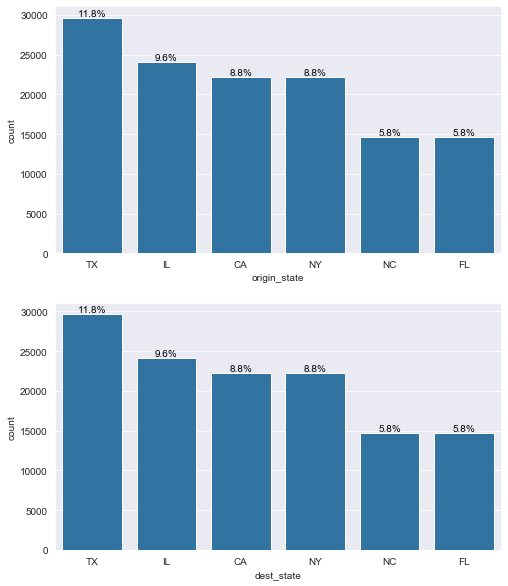

In [91]:
plt.figure(figsize = [8, 10]) # larger figure size for subplots

origin_order = df_cancelled.origin_state.value_counts().index[:6]
dest_order = df_cancelled.dest_state.value_counts().index[:6] 

plt.subplot(2, 1, 1) # 2 rows, 1 col, subplot 1
sb.countplot(data = df_cancelled, x = 'origin_state', color=base_color, order=origin_order)
chart_props(df_cancelled, 'origin_state')

plt.subplot(2, 1, 2) # 2 rows, 1 col, subplot 2
sb.countplot(data = df_cancelled, x = 'dest_state', color=base_color, order=dest_order)
chart_props(df_cancelled, 'dest_state')


Approximately 50% of flight cancellations occur in 6 states: Texas, Illinois, California, New York, North Carolina and Florida.

Interestingly, the ranking of flights cancelled per origin matches the destination raking. This may be due to severe weather conditions during winter period.

Looking into which month most cancellations occured may support this claim.

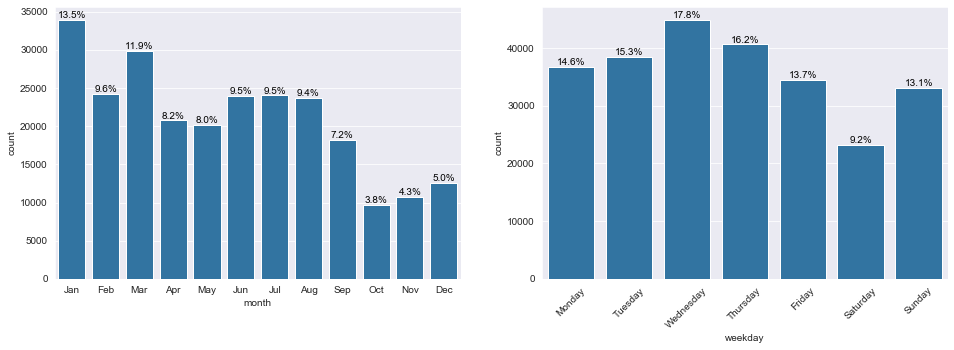

In [113]:
plt.figure(figsize=[16, 5])


order_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplot(1, 2, 1)
sb.countplot(data=df_cancelled, x='month', color=base_color, order=order_month)
chart_props(df_cancelled, 'month')


order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.subplot(1, 2, 2)
sb.countplot(data=df_cancelled, x='weekday', color=base_color, order=order_week)
chart_props(df_cancelled, 'weekday')
plt.xticks(rotation=45);

It looks like flights tend to be cancelled more in the first quarter of the year. Flight cancellation progressively decreases, registering lower cancellation rate in the last quarter.

Saturday is the day of the week which registers the least number of cancellations: less than 10%.

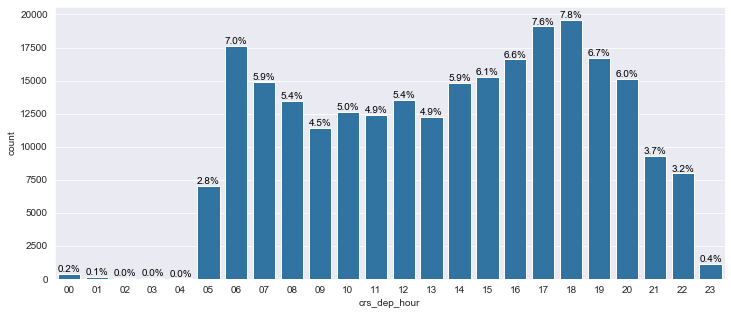

In [101]:
plt.figure(figsize=[12, 5])
sb.countplot(data=df_cancelled, x='crs_dep_hour', color=base_color)
chart_props(df_cancelled, 'crs_dep_hour')

Is the trend similar in both years? What is the major cause for cancellation at 6h, 17h and 18h? Why there is almost no cancellation between 0h and 4h? 

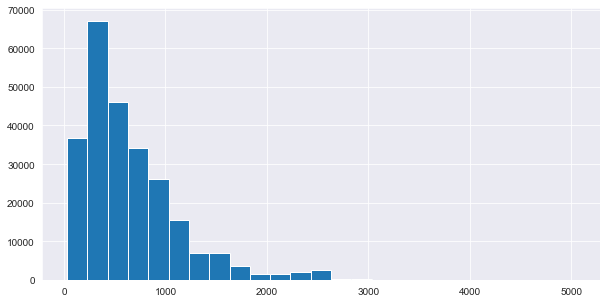

In [117]:
plt.figure(figsize=[10, 5])
bin_edges = np.arange(df_cancelled['distance'].min(), df_cancelled['distance'].max()+200, 200)
plt.hist(data=df_cancelled, x='distance', bins=bin_edges);

In [ ]:
# This chart shows outliers, next chart will focus on delays
bin_edges = np.arange(flights.arr_delay.min(), flights.arr_delay.max()+30, 30)
plt.figure(figsize=[8, 5])
plt.hist(data=flights, x='arr_delay', bins=bin_edges);

In [ ]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
range_min = np.log10(flights.arr_delay.min())
range_max = np.log10(flights.arr_delay.max())
bins = 10 ** np.arange(range_min, range_max+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=flights, x='arr_delay', bins = bins)
plt.xscale('log')
plt.xticks([120, 1e3, 2e3, 5e3, 1e4, 2e4], [120, '240', '480', '960', '1920', '3840'])
plt.xlabel('Delay (min)')
plt.show()

Most flight delays are in the range of 2 to 8 hours.

In [ ]:
# During which times occur the most delays?
flights['crs_hour'] = flights['crs_dep_time'].astype(str).str[0:2]

In [ ]:
chart_props('crs_hour', order_cat=False)

Delays start to build up as the hours passes by, reaching a peak at 5PM, and decreases hour by hour. Aircraft delay being the main cause, the decrease may be due to end of aircraft operation for that day.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!